# Øvelse 4 - Michaelis-Menten 

***

Se word dokument i canvas for dypere forklaringer om Michaelis-Menten og hvilke antagelser som taes for at ligningen skal være gyldig. Dette er et arbiedsark som baserer seg på Python for å løse oppgavene som dere skal ha med i journalen. Ved å bruke python har vi bedre kontroll over databehandlingen, men det krever at vi må spesifisere hva vi vil oppnå med kode. Nedover i dette arbeidsarket skal vi se på hvordan vi henter inn resultatene fra laboratoriet og bedømmer Km og Vmax ved bruk av 3 metoder. 

1. Bedømme Km og Vmax visuellt
2. Bedømme Km og Vmax med kurvetilpassning 
3. Bedømme Km og Vmax ved bruk av Lineweaver-Burke plot

Når dere løser disse oppgavene, tenk over hva dere gjør og hvordan dette påvirker troverdigheten til Km og Vmax resultatene. Dere skal bruke disse resultatene til å raskt diskutere i journalen fordeler og ulemper ved de ulike metodene. 


***


## Programmering 

***

Python som programmeringsspråk er en av de enklere å lære seg som nybegynner, men den kan være vedlig kraftig og vil holde for de fleste brukområdere deres. Jeg anbefaler at dere lærer dere Python, men dette vil ikke være noe krav for dette kurset, eller relevant for eksamen, men kun en anbefaling for videre karriere. I koding generelt snakkes det om syntax, som er måten ting blir skrevet på. Nedover i dette arket har jeg lagt inn koden som dere skal bruke, dere trenger ikke å skrive noe selv, men for å hjelpe til med å forstå syntaxen her, så skal jeg kort definere noen sentrale elementer ved Python syntaxen.

* '=' tegnet brukes til å definere en variabel, vi lagerer hva som er til høyre for tegnet i variablen definert på venstre side
   * Variabler kan være int, string, float som betyr heltall, bokstaver eller desimaler 
* 'navn()' viser til en funksjon som gjør en oppgave, mens det inne i parantesen er argumenter som trengs for å gjennomføre        oppgaven 
* I Python teller vi fra 0, så første kolonne vil være 0
* `Print()` vil sende teksten innenfor parantesene til konsolen
* Hvis dere ikke forstår hva en enkelt setning betyr så ikke stress, dere kan søke det opp, eller spør om hjelp

I tillegg til at Python er et bra språk for nybegynnere, så finnes det store resurser på internettet. Som oftest så har noen andre der ute gjort noe tilsvarende som hva dere ønsker og delt dette. Dette lagres på nettet og kan enkelt hentes inn i våre filer for å brukes av oss og det gjøres ved å bruke `import` da henter vi andre sin kode og benytter oss av den. Så det første vi gjør er ofte å hente inn de pakkene vi ønsker. 


***

In [30]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### 1.Bedømme Km og Vmax visuelt 

Ved å bedømme Km og Vmax visuelt, så ser vi på grafen av v mot [S] og bestemmer en horisontal linje som går parallellt med den hyperbole kurven. Nedenfor skal dere endre på Vmax verdien slik at den ligger parallellt med de eksperimentelle resultatene deres. Dette er en metode som ofte brukes, men mens dere gjør det, tenk over noen eventuelle feilkilder som kan oppstå ved å gjøre det på denne måten.    

In [23]:
fil = open('Data.csv','r')                              
data = pd.read_csv(fil, header = None, skiprows = 1)   
                                                      
S = (data[0])                                         
v = (data[1])                                              

***

Det første vi gjør her er å bruke funksjonen `open()` til å åpne filen Data.csv og spesifiserer til Python at vi skal lese filen (r) og lagrer informasjonen som er lest inn i variablen 'fil'. Videre ønsker vi å modifisere dataen litt for at den lettere skal kunne leses inn. Dette gjør vi ved å lage en ny variabel 'data' som vi bruker funksjonen `pd.read_csv()` for å lese inn dataen vår (fil) og vi spesifiserer at det ikke er titler i filen vår med `header = None` og vi forteller Python at de skal hoppe over første linje med `skiprows = 1`. Det gjør vi fordi der er navnet på kolonnene (v og S) 

Deretter lager vi nye variabler S og v med å hente ut dataen fra første og andre kolonne (0, 1)

Videre ønsker vi å se på dataen i konsolen ved å bruke `print(data)` 


***

In [24]:
print(data)

          0        1   2   3
0  0.000000  0.00000 NaN NaN
1  0.000008  0.00015 NaN NaN
2  0.000017  0.00020 NaN NaN
3  0.000034  0.00035 NaN NaN
4  0.000068  0.00055 NaN NaN
5  0.000101  0.00055 NaN NaN
6  0.000169  0.00075 NaN NaN
7  0.000337  0.00080 NaN NaN
8  0.000840  0.00085 NaN NaN
9  0.002940  0.00090 NaN NaN


***
Etter at vi har sett at vi har lest inn dataen riktig, ønsker vi å visualisere den ved bruk av en graf `plt.` er en pakke som er ansvarlig for å grafisk fremstille dataen og den bruker flere funksjoner for å gjennomføre små oppgaver feks. `plt.title()` setter en overskrift på figuren deres

##### Oppgave 1.1: Her ønsker jeg at dere skal endre på Vmax variablen for å lage en horisontal linje som skal ligge parallellt med platået. 



***


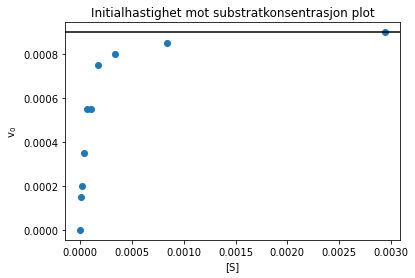

In [26]:
plt.scatter(S,v)
plt.title('Initialhastighet mot substratkonsentrasjon plot')
plt.xlabel('[S]')
plt.ylabel('v$_0$')

Vmax = 0.0009

Km = Vmax/2
plt.axhline(Vmax, color = 'black')



In [6]:
print(('Ved å visuellt bedømme grafen er Vmax:{}').format(Vmax))

Ved å visuellt bedømme grafen er Vmax:0.0006


***

For å bedømme Km så vet vi at det er substratkonsentrasjonen ved Vmax/2. I grafen over ser vi at det blir litt vanskelig å Km fordi økningen i initialhastigheten er høy i området hvor Km skal bestemmes, vi kan derfor endre litt på innstillingene til grafen for å lettere bestemme Km. Som nevnt tidligere gir Python oss bedre kontroll, men det krever at vi spesifiserer mer gjennom kode. 

For å se nærmere på området hvor Km skal bestemmes kan vi endre på x-aksen ved å bruke `plt.xlim()` funksjonen som mottar start og slutt verdiene som argument. Her kan dere endre på tallene om dere ønsker det. 

I tillegg så ser vi at tallene begynner å bli veldig små, for å lage et mer oversiktlig bilde, så bruker jeg funksjonen `plt.ticklabel_format()` hvor vi spesifiserer at vi vil endre begge aksene, og stilen skal være `sci` som er scientific ie. (1e04). Deretter forteller vi at begge aksene skal begynne på 0. 

##### Oppgave 1.2: Her ønsker jeg at dere skal endre på Km variablen for å lage et kryss med Vmax/2 (Horisontal linje) 


***

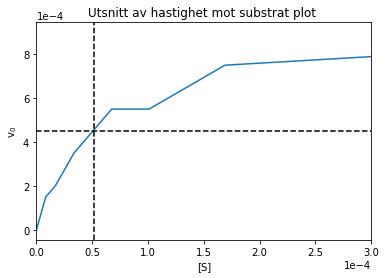

In [29]:
plt.plot(S,v)
plt.title('Utsnitt av hastighet mot substrat plot ')
plt.xlabel('[S]')
plt.ylabel('v$_0$')
plt.xlim(0,0.0003)
plt.ticklabel_format(axis = 'both', style = 'sci', scilimits=(0,0))



Vmax_halve = Vmax/2

Km = 0.000052


plt.axhline(Vmax_halve, color = 'black', linestyle = '--')
plt.axvline(Km, color = 'black', linestyle = '--' )



In [10]:
print(( 'Ved å visuellt bedømme grafen er Vmax:{} og Km:{}').format(Vmax, Km))

Ved å visuellt bedømme grafen er Vmax:0.0009 og Km:2e-05


### 2. Bedømme Km og Vmax med kurvetilpassning

Ved å bedømme Km og Vmax ved bruk at kurvetilpassning så bruker vi Michaelis-Menten funksjonen $v = Vmax[S]/Km + [S]$ til å beregne Km og Vmax verdier som passer de eksperiemtelle resultatene best. Dette gjøres ved å gjennomføre en minste kvadraters metode for hvert punkt. Dette er noe som gjøres mye i databehandling, og det fine med python er at det vil alltid finnes noen som har gjort det dere lurer på før dere. Dette kan vi benytte og noen har skrevet kode for å gjennomføre kurvetilpassing for oss. 

***

For å gjennomføre en kurvetilpassning av de eksperimentelle dataene, så benytter vi oss av en pakke `curve_fit` som inneholder en metoden for å kurvetilpasse. Her gjennomfører vi en ikke-lineær minstekvadratersmetode. Men for at denne pakken skal kunne gjøre jobbe sin må vi gi den funksjonen som vi ønsker å kurvetilpasse data til. I Python syntax definerer vi en funksjon med ordet `def` og navnet på den definerte funksjonen kommer rette etter og blir da `def Michaelis_Menten_Funksjonen()`. Videre så spesifiserer vi argumentene som er substratkonsentrasjonene (S) og variabelene Km og Vmax. 

Slik som pakken er laget, så vil den gi oss to variabler `Km_og_Vmax` variablen som inneholder kurvetilpasset Km og Vmax verdiene og `cov` variablen som er en statistisk beregning som vi ikke skal diskutere her og dere kan se bort i fra den.

***

In [13]:
def Michaelis_Menten_Funksjonen(S, km, vmax):
        return((km*S)/(vmax+S))


Km_og_Vmax, cov = curve_fit(f = Michaelis_Menten_Funksjonen, xdata = S,ydata = v)



***

Nå som vi har definert Michaelis-Menten funksjonen over, så kan vi tegne den inn på figuren sammen med de eksperimentelle dataen. I koden over definerte vi Km og Vmax ved kurvetilpassing, men for å vise det grafisk, så må vi lage et sett med teoretisk data som følger den eksperimentelle. `xModel` og `yModel` er teoretisk data som bygger på vår eksperiementelle, men de legger inn mange flere datapunkter slik at kurven blir sammenhengenede og vi får en fin sammenhengende kurve. 

Måten vi gjør dette er å gi Michaelis-Menten funksjonen alle substratkonsentrasjoner fra den laveste `min(S)` til den høyeste `max(S)`. og ved bruk av funksjonen `np.linspace()` fyller vi inn alle de manglende substratkonsentrasjonene. Deretter kan vi lage en heltrukket linje.  


***

In [14]:
xModel = np.linspace(min(S), max(S))
yModel = Michaelis_Menten_Funksjonen(xModel, *Km_og_Vmax)

##### Oppgave 2.1: Her ønsker jeg at dere skal prøve å plotte den kurvetilpassede dataen deres og noterer Km og Vmax, om det ikke går så hopper dere over denne. 

Text(0, 0.5, 'v$_0$')

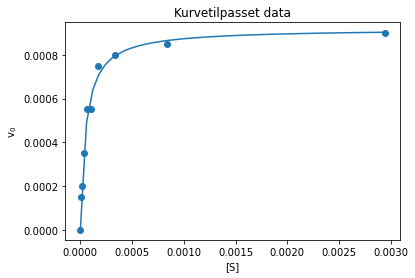

In [15]:
plt.plot(xModel, yModel)
plt.scatter(S,v)
plt.title('Kurvetilpasset data')
plt.xlabel('[S]')
plt.ylabel('v$_0$')


In [16]:
Vmax, Km = Km_og_Vmax
print(('Ved bruk av kurvetilpassning er Vmax:{} og Km:{}').format(Vmax, Km))


Ved bruk av kurvetilpassning er Vmax:0.0009187680928522808 og Km:5.235215587388615e-05


### 3. Bedømme Km og Vmax med Lineweaver-Burke 

Lineweaver-Burke er en transformering av den hyperbole Michaelis-Menten funksjonen til en lineær funksjon, dette gjøres ved å gjennomføre en resiprokal av Michaelis-Menten funksjonen. Vi kan ved bruk av denne metoden bestemme Vmax fra y-akseen og Km fra stigningstallet.  



***

Når vi skal gjøre om på de eksperiementelle resultatene fra S og v til 1/S og 1/v, så er dette matematiske beregninger som enkelt kan gjøres i Python, men før vi kan gjøre det må vi fjerne 0 fra filene fordi 1/0 går ikke. Først så printer vi ut dataen for å se på den igjen

***

In [9]:
print(data)

          0        1   2   3
0  0.000000  0.00000 NaN NaN
1  0.000008  0.00015 NaN NaN
2  0.000017  0.00020 NaN NaN
3  0.000034  0.00035 NaN NaN
4  0.000068  0.00055 NaN NaN
5  0.000101  0.00055 NaN NaN
6  0.000169  0.00075 NaN NaN
7  0.000337  0.00080 NaN NaN
8  0.000840  0.00085 NaN NaN
9  0.002940  0.00090 NaN NaN


***

Vi kan derfor be Python gjennomføre 1/x for alle tallene med unntak av den første raden, ved å kun lese inn fra den andre raden (husk at python teller fra 0) `1/data[kolonne][1:]`. Videre så gjør vi litt mer med dataene her, men dette er kun for å lage tallene på det formatet som en pakke vi bruker nedenfor ber om. Dette trenger dere ikke fokusere på. 

***

In [19]:
ENoverS = np.array((1/data[0][1:])).reshape(-1,1)
ENoverv = np.array((1/data[1][1:])).reshape(-1,1)



print(ENoverS,ENoverv)

[[119047.61904762]
 [ 59171.59763314]
 [ 29673.59050445]
 [ 14814.81481481]
 [  9900.99009901]
 [  5917.15976331]
 [  2967.35905045]
 [  1190.47619048]
 [   340.13605442]] [[6666.66666667]
 [5000.        ]
 [2857.14285714]
 [1818.18181818]
 [1818.18181818]
 [1333.33333333]
 [1250.        ]
 [1176.47058824]
 [1111.11111111]]


***

På lik måte som ved kurvetilpassingen, så bruker vi her en pakke for å gjøre lineærregresjon. Den benytter seg av en lineær minstekvadratersmetode for å lage en teoretisk heltrukketlinje på $y = ax+b$ format som best passer de eksperimentelle dataene. 

***

Text(0, 0.5, '1/[S]')

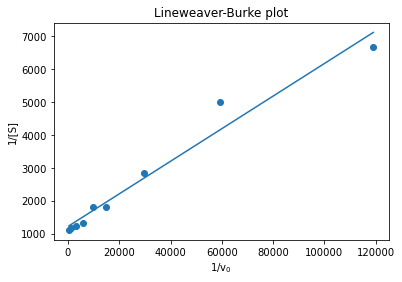

In [20]:
plt.scatter(ENoverS,ENoverv)
lineærRegresjon = LinearRegression()
lineærRegresjon.fit(ENoverS,ENoverv)
Predikert_data = lineærRegresjon.predict(ENoverS)

plt.plot(ENoverS, Predikert_data)
plt.title('Lineweaver-Burke plot')
plt.xlabel('1/v$_0$')
plt.ylabel('1/[S]')

***

##### Øppgave 3.1: Her ønsker jeg at dere skal gjennomføre en lineærregresjon av dataene deres og notere Vmax og Km verdier. 

***

In [21]:
y_skjæringspunkt = lineærRegresjon.intercept_
stigningstall = lineærRegresjon.coef_

Vmax = 1/y_skjæringspunkt
Km = Vmax*stigningstall

print(('Ved bruk av Lineweaver-Burke er Vmax:{} og Km:{}').format(Vmax, Km))

Ved bruk av Lineweaver-Burke er Vmax:[0.00081683] og Km:[[4.03767514e-05]]
